In [47]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
# read in gene location information
gloc = pd.read_csv("../data/gene_locations.tsv",sep="\t",index_col=0)
gloc.head()

,seqname,start,end,gene_name
gene_id,,,,
ENSMUSG00000102693.1,chr1,3073253,3074322,4933401J01Rik
ENSMUSG00000064842.1,chr1,3102016,3102125,Gm26206
ENSMUSG00000051951.5,chr1,3205901,3671498,Xkr4
ENSMUSG00000102851.1,chr1,3252757,3253236,Gm18956
ENSMUSG00000103377.1,chr1,3365731,3368549,Gm37180


In [5]:
len(gloc)

55401

In [3]:
adata1 = sc.read_h5ad("../data/ENCFF138QCP.h5ad")
adata1

AnnData object with n_obs × n_vars = 737280 × 69690
    var: 'feature_types', 'gene_symbols', 'gene_names'
    uns: 'annotation', 'biosample_accession', 'derived_from', 'description', 'experiment_accession', 'filtered_barcodes', 'genome'

In [1]:
#adata1.obs

In [5]:
len(set(adata1.obs.index))

737280

In [6]:
adata1.var

,feature_types,gene_symbols,gene_names
ENSMUSG00000102693.1,Gene Expression,RP23-271O17.1,RP23-271O17.1
ENSMUSG00000064842.1,Gene Expression,Gm26206,Gm26206
ENSMUSG00000051951.5,Gene Expression,Xkr4,Xkr4
ENSMUSG00000102851.1,Gene Expression,RP23-317L18.1,RP23-317L18.1
ENSMUSG00000103377.1,Gene Expression,RP23-317L18.4,RP23-317L18.4
...,...,...,...
gSpikein_ERCC-00164,Gene Expression,gSpikein_ERCC-00164,gSpikein_ERCC-00164
gSpikein_ERCC-00165,Gene Expression,gSpikein_ERCC-00165,gSpikein_ERCC-00165
gSpikein_ERCC-00168,Gene Expression,gSpikein_ERCC-00168,gSpikein_ERCC-00168
gSpikein_ERCC-00170,Gene Expression,gSpikein_ERCC-00170,gSpikein_ERCC-00170


In [52]:
len(adata1.var)

69690

In [37]:
#print(adata1.X)

In [34]:
#print(adata1.X[737278:]) # tuple is (obs-sequence, gene_num), number is I am guessing maybe some measure of expression level??

# I shall assume this is number of cells

In [35]:
#print(np.argwhere(adata1.X[:10].todense()!=0)) # extract tuples (obs-seq, gene_idx)

In [36]:
#print(np.sum(adata1.X[:10].toarray(),axis=0)) # list of 69690. 
# At the position corresponding to gene_idx, it will have some value we need.

In [51]:
#print(np.sum(adata1.X[31:38].toarray(),axis=1)) # for counts of each observed sequence # we don't really need this?
# running this kills kernel. DO NOT RUN.

In [49]:
#print(np.argwhere(adata1.X[31].toarray()!=0))

In [50]:
#print(np.argwhere(np.sum(adata1.X[31].toarray(),axis=0)!=0))

In [39]:
np.argwhere(adata1.X[737278].toarray()!=0)

array([[    0,    31],
       [    0,    35],
       [    0,    43],
       ...,
       [    0, 43336],
       [    0, 43340],
       [    0, 43343]])

In [45]:
len(np.argwhere(adata1.X[737278].toarray()!=0))

2892

In [47]:
x[np.argwhere(adata1.X[737278].toarray()!=0)[2889][0],np.argwhere(adata1.X[737278].toarray()!=0)[2889][1]]

12.0

In [33]:
x = adata1.X[737278].toarray()
x[0,43336]

12.0

In [4]:
df = adata1.var
df['gene_names'] = [g.upper() for g in df['gene_names']]
df['row_id'] = range(len(df)) # will update later
df.head()

,feature_types,gene_symbols,gene_names,row_id
ENSMUSG00000102693.1,Gene Expression,RP23-271O17.1,RP23-271O17.1,0
ENSMUSG00000064842.1,Gene Expression,Gm26206,GM26206,1
ENSMUSG00000051951.5,Gene Expression,Xkr4,XKR4,2
ENSMUSG00000102851.1,Gene Expression,RP23-317L18.1,RP23-317L18.1,3
ENSMUSG00000103377.1,Gene Expression,RP23-317L18.4,RP23-317L18.4,4


In [5]:
count_list = np.zeros(len(adata1.var))
n_cells = np.zeros(len(adata1.var)) # comment these out later
for i in range(len(set(adata1.obs.index))): # 
    if i % 100000 == 0:
        print("Progress: Completed iteration: ", i)
    info = adata1.X[i].toarray()
    tuples = np.argwhere(info!=0)
    for tup in tuples:
        count_list[tup[1]] += info[tup[0],tup[1]]
        n_cells[tup[1]] += 1

Progress: Completed iteration:  0
Progress: Completed iteration:  100000
Progress: Completed iteration:  200000
Progress: Completed iteration:  300000
Progress: Completed iteration:  400000
Progress: Completed iteration:  500000
Progress: Completed iteration:  600000
Progress: Completed iteration:  700000


In [6]:
df["counts"] = count_list
df["n_cells"] = n_cells
df.head()

,feature_types,gene_symbols,gene_names,row_id,counts,n_cells
ENSMUSG00000102693.1,Gene Expression,RP23-271O17.1,RP23-271O17.1,0,0.0,0.0
ENSMUSG00000064842.1,Gene Expression,Gm26206,GM26206,1,0.0,0.0
ENSMUSG00000051951.5,Gene Expression,Xkr4,XKR4,2,8.0,8.0
ENSMUSG00000102851.1,Gene Expression,RP23-317L18.1,RP23-317L18.1,3,0.0,0.0
ENSMUSG00000103377.1,Gene Expression,RP23-317L18.4,RP23-317L18.4,4,22.0,21.0


In [7]:
df_trimmed = df[df["counts"]>0]
df_trimmed.head()

,feature_types,gene_symbols,gene_names,row_id,counts,n_cells
ENSMUSG00000051951.5,Gene Expression,Xkr4,XKR4,2,8.0,8.0
ENSMUSG00000103377.1,Gene Expression,RP23-317L18.4,RP23-317L18.4,4,22.0,21.0
ENSMUSG00000104017.1,Gene Expression,RP23-317L18.3,RP23-317L18.3,5,20.0,19.0
ENSMUSG00000103025.1,Gene Expression,RP23-115I1.6,RP23-115I1.6,6,3.0,3.0
ENSMUSG00000089699.1,Gene Expression,Gm1992,GM1992,7,3.0,3.0


In [19]:
c19_genes = gloc[gloc["seqname"]=="chr19"]
#c18_genes.index # ideally index would be e.g. ENSMUSG00000...
c19_idxs = set(c19_genes.index).intersection(set(df_trimmed.index))
len(c19_idxs)

129

In [20]:
c19_idxs = list(df_trimmed[df_trimmed.index.isin(c19_idxs)]["row_id"])

In [21]:
x = adata1.X.toarray() # 737280 arrays of length 69690

In [22]:
# get info for chromosome 1 only.
x19 = pd.DataFrame(x).iloc[:,c19_idxs]
x19
# basically get the columns in x which correspond to the row idxs in adata1.var
#sns.heatmap(x1)

,38099,38128,38145,38152,38154,38155,38157,38180,38188,38200,...,39075,39080,39086,39087,39088,39089,39091,39094,39106,39112
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
737276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
737277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
737278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
np.log(x19+1)

,38099,38128,38145,38152,38154,38155,38157,38180,38188,38200,...,39075,39080,39086,39087,39088,39089,39091,39094,39106,39112
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
737276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
737277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
737278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
np.sum(x19,axis=0)

38099       8.0
38128      12.0
38145    1533.0
38152     224.0
38154    1631.0
          ...  
39089      40.0
39091       3.0
39094       2.0
39106    3722.0
39112       7.0
Length: 129, dtype: float32

In [30]:
x19.loc[:10,:]

,38099,38128,38145,38152,38154,38155,38157,38180,38188,38200,...,39075,39080,39086,39087,39088,39089,39091,39094,39106,39112
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

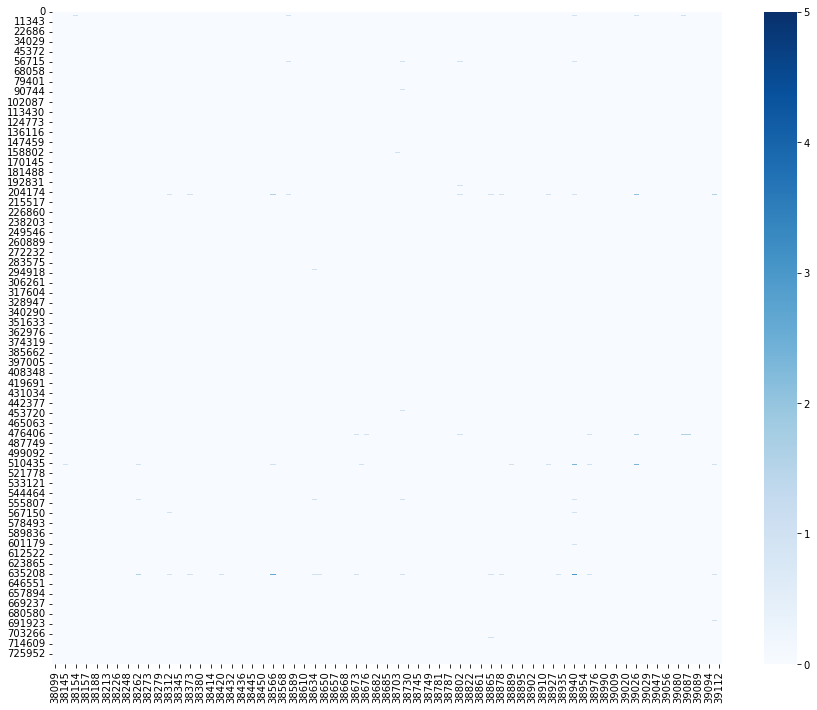

In [48]:
plt.figure(figsize=(15,12))
sns.heatmap(np.log2(x19+1),cmap="Blues")

<AxesSubplot:>

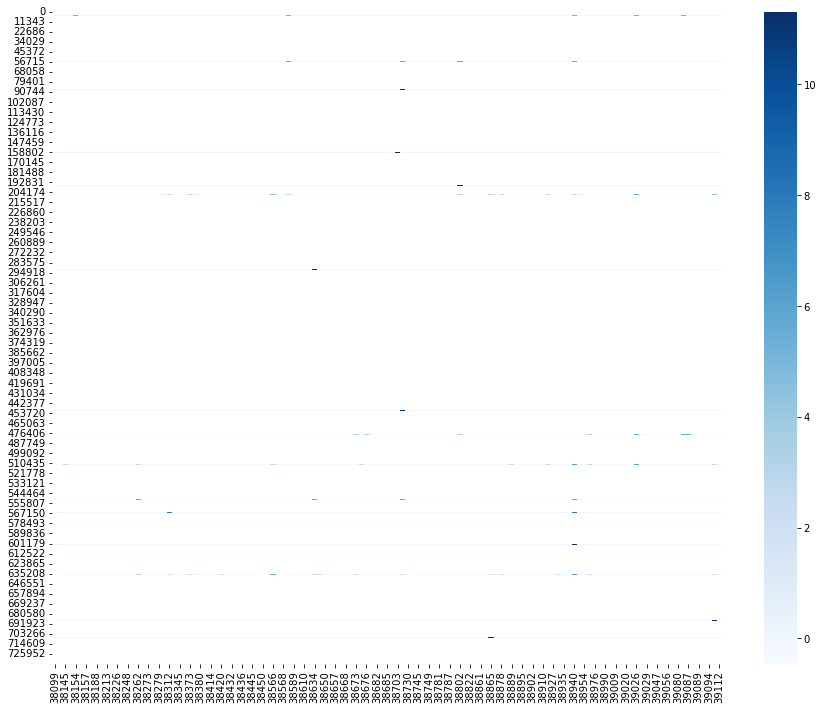

In [49]:
plt.figure(figsize=(15,12))
sns.heatmap(zscore(np.log2(x19+1),axis=1),cmap="Blues") # column-wise (observation-wise) normalization

In [68]:
# idx_to_count = dict(zip(range(len(adata1.var)), [0]*len(adata1.var)))
# # using np for the 3d matrix kills kernel, so I must resort to this
# for i in range(len(set(adata1.obs.index))): # 
#     info = adata1.X[i].toarray()
#     tuples = np.argwhere(info!=0)
#     for tup in tuples:
#         idx_to_count[tup[1]] += info[tup[0],tup[1]]

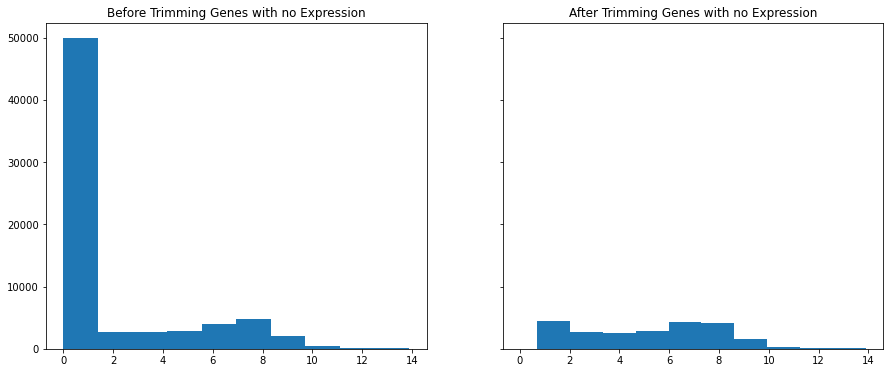

In [103]:
fig, ax = plt.subplots(1,2,sharey=True,sharex=True,figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Before Trimming Genes with no Expression")
plt.hist(np.log(df["counts"]+1))
plt.subplot(1,2,2)
plt.title("After Trimming Genes with no Expression")
plt.hist(np.log(df_trimmed["counts"]+1))
plt.show()